In [1]:
pwd

'C:\\Users\\Ankit'

In [2]:
import pandas as pd

In [15]:
df1=pd.read_csv("2019.08.30_PAID.csi-corgadmin-view-csi_community_member (10).csv",skipinitialspace=True)
df2=pd.read_csv("2019.09.06_PAID.csi-corgadmin-view-csi_community_member (14)_DOESN'T MATCH.csv",skipinitialspace=True)

In [17]:
df1.columns

Index(['Internals Nid', 'Application Nid', 'Name', 'Application Status',
       'Location', 'Email', 'Phone', 'Street address', 'City',
       'Province/State', 'Postal code', 'Country', 'Payment  Status',
       'Freshbooks Org ID', 'Freshbooks Recurring ID', 'Roles', 'Version',
       'Internals Post date', 'Application Post date',
       'Internals Updated date', 'CSI End Date', 'Special Arrangement Expiry',
       'Coupon', 'Special Arrangement Type'],
      dtype='object')

In [20]:
set(df1["Name"]).difference(df2["Name"])

{'Ashfaq Ahmed',
 'Christal  Earle',
 'Iver Wan',
 'Josh Harrower',
 'Julia Matthews',
 'Kareen Awadalla',
 'Leanne Campbell',
 'Maya Kurup',
 'Mohammad Al-Ansari'}

In [11]:
df1.columns

Index(['Internals Nid', 'Application Nid', 'Name', 'Application Status',
       'Location', 'Email', 'Phone', 'Street address', 'City',
       'Province/State', 'Postal code', 'Country', 'Payment  Status',
       'Freshbooks Org ID', 'Freshbooks Recurring ID', 'Roles', 'Version',
       'Internals Post date', 'Application Post date',
       'Internals Updated date', 'CSI End Date', 'Special Arrangement Expiry',
       'Coupon', 'Special Arrangement Type'],
      dtype='object')

In [12]:
set(df1.Internals Nid).difference(df2.Internals Nid)

SyntaxError: invalid syntax (<ipython-input-12-cdc046534e86>, line 1)

In [25]:
set(df1['Name']).difference(df2['Name'])

{'Ashfaq Ahmed',
 'Christal  Earle',
 'Iver Wan',
 'Josh Harrower',
 'Julia Matthews',
 'Kareen Awadalla',
 'Leanne Campbell',
 'Maya Kurup',
 'Mohammad Al-Ansari'}

## Import Packages

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [3]:
comm_member=pd.read_csv('Data/csi-corgadmin-view-csi_community_member (2).csv')
acc_aging=pd.read_csv("Data/Centre for Social Innovation_AccountsAging (2).csv")

## Process and Join Data

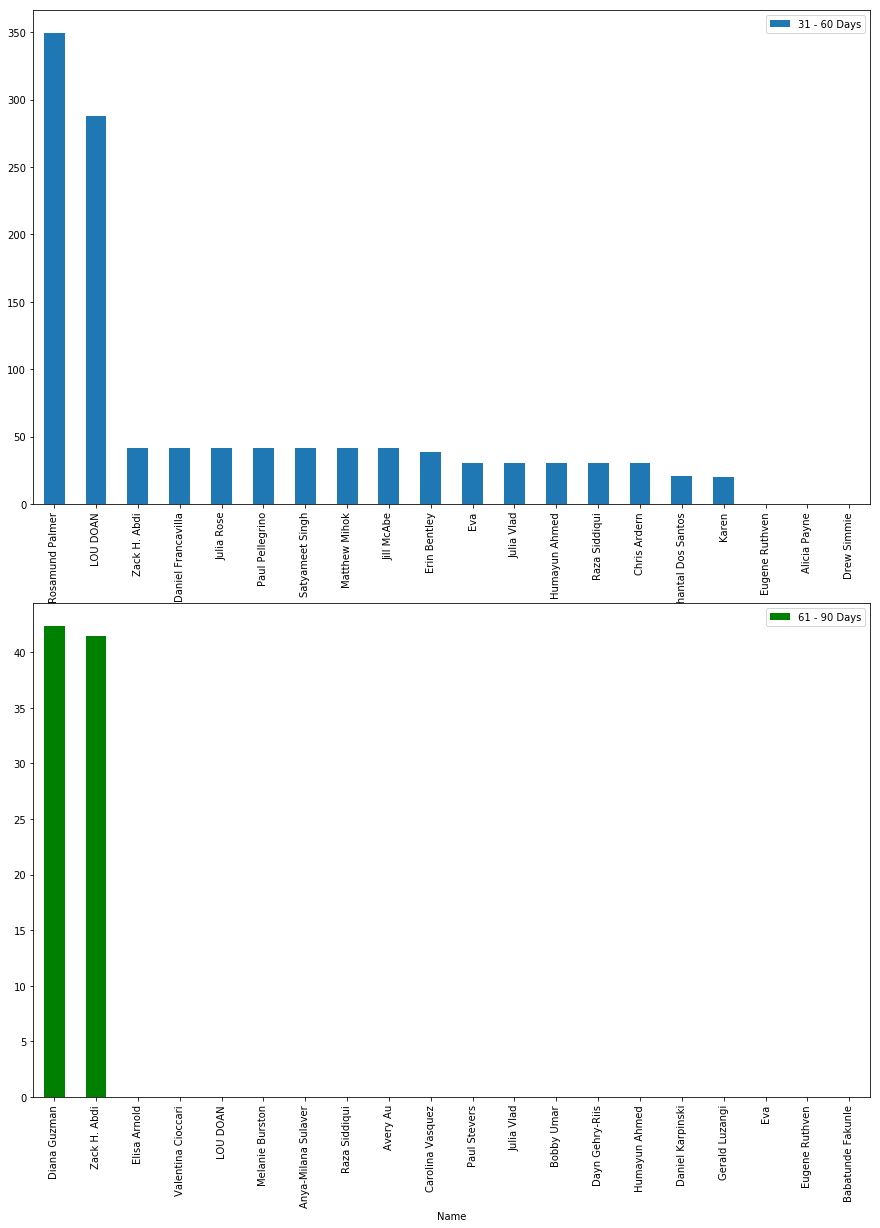

In [36]:
comm_member=comm_member.rename(columns={'Application Status':'Appl_Status'})

#Split client name in acc_aging by hyphens, and take the first part only
acc_aging['Client_Name_Truncated']=acc_aging.Client.str.split(' - ').str[0]

# Select only those records from community member dataset that are NOT alumni
comm_member_active=comm_member.query('Appl_Status != \'Alumni\'')



#Join Community Member, and Account Aging on the above split client name; sort dataset by aging bucket; and plot the data
output=pd.merge(comm_member_active,acc_aging,left_on='Name',right_on='Client_Name_Truncated',how='inner')

#Plot charts
fig, ax = plt.subplots(2,1,figsize=(15,20))
output.sort_values(by='31 - 60 Days', ascending=False).head(20)[['Name','31 - 60 Days']].plot(kind='bar',x='Name',ax=ax[0])
output.sort_values(by='61 - 90 Days', ascending=False).head(20)[['Name','61 - 90 Days']].plot(kind='bar',color='g',x='Name',ax=ax[1])


plt.show()

#Write processed data to a file
Filename="outputfile.csv"
pd.merge(comm_member_active,acc_aging,left_on='Name',right_on='Client_Name_Truncated',how='inner').sort_values(by='31 - 60 Days', ascending=False).head(20)[['Name','31 - 60 Days']].to_csv(Filename)
